#  Pixelwise Inspection of Geotiff Files

In [1]:
!which python

/c/Anaconda2/python


In [2]:
import os, sys
import glob

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.image as mpimg
import scipy.stats as spys

import gdal
from gdalconst import *
import numpy as np


def read_raster_bands(geofile):
# replaced def readtiff(geofile):
    """ read raster bands into numpy array
    input param rasterfile: geofile
    return: a list of[ numpy ]
    """


    # Register drivers
    gdal.AllRegister()

    # Open image
    ds = gdal.Open(geofile, GA_ReadOnly)

    if ds is None:
        raise Exception('Could not open image file %s' %(geofile))
        

    # get image size
    rows = ds.RasterYSize
    cols = ds.RasterXSize
    numbands = ds.RasterCount

#     print 'rows= %s, cols= %s, number of bands = %s' %(str(rows), str(cols), str(numbands))
#     print ("********************")

    # get projection and resolution info of the raster
    proj = ds.GetProjection()

    transform = ds.GetGeoTransform()
    xOrigin = transform[0]
    yOrigin = transform[3]
    pixelWidth = transform[1]
    pixelHeight = transform[5]

#     print ("Projection Info = %s"%(proj))
#     print ("xOrigin = %s,  yOrigin = %s "%(xOrigin, yOrigin))
#     print ("pixelWidth = %s,  pixelHeight = %s "%(pixelWidth, pixelHeight))
    
    # Read the data into numpy array
    numarray=[]
    for i in range(1,numbands+1):
        band =ds.GetRasterBand(i)  # the very first band is i=1
        data = band.ReadAsArray(0,0,cols,rows) #.astype('float32')
        numarray.append(data)
    
    # Once we're done, close properly the dataset
    ds = None
    
    return numarray

In [17]:

def showimages(rastfile_a,rastfile_b=None):
    """ Display side-by-side two geo-raster files.
    
    """
    numalist_a = read_raster_bands(rastfile_a)
    band0a=numalist_a[0]
    
    if rastfile_b is not None:
        numalist_b = read_raster_bands(rastfile_b)
        band0b=numalist_b[0]
    
  
    plt.imshow(band0a)
    plt.title('%s\n'%('Image '+ rastfile_a)) 
    plt.colorbar()
    #ax[0].imshow(band0a)
    #ax[1].imshow(band0a)

#if __name__ == "__main__":
#    infile = sys.argv[1]
#    nparlist = readtiff(infile)

In [13]:
# Display an images

# geotifile='/xdisk/fzhang/outdir/fei_test_svr_prediction.tif'
# geotifile='/xdisk/fzhang/outdir/sirsam_potassium_randomforest_prediction.tif' #'nci_sirsam_output_randomforest.tif'


path2='/Softlab/Data/uncoverml/GA-cover2.out' #'/xdisk/fzhang/uncoverml_testdata'
path2='/short/v10/fxz547/uncoverml/GA-cover2.out'
path2='/e/Data/uncoverml/GA-cover2'
path2='E:\Data\MT_Datasets'

# specify file name pattern
geotifiles=glob.glob('%s/*.tif'%path2)

print (geotifiles)

print("Number of tif files ", len(geotifiles))
nf=0

['E:\\Data\\MT_Datasets\\aussie_etopo1_bedrock.tif', 'E:\\Data\\MT_Datasets\\etopo1.tif', 'E:\\Data\\MT_Datasets\\etopo1_bedrock.tif']
('Number of tif files ', 3)


(2, 'E:\\Data\\MT_Datasets\\etopo1_bedrock.tif')
??? WARN: the last file has been visualised, back to the first one???


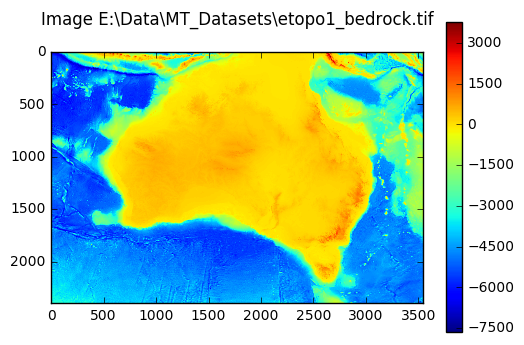

In [20]:
print(nf, geotifiles[nf])

showimages(geotifiles[nf])

if nf < len(geotifiles)-1:
    nf=nf+1
else:
    print("??? WARN: the last file has been visualised, back to the first one???")
    nf=0
    

In [ ]:
#https://matplotlib.org/examples/pylab_examples/colorbar_tick_labelling_demo.html

In [40]:
def plot_geotiff(geofile='/e/Data/uncoverml/GA-cover2/PM_Gravity.tif'):
    
    
    # Register drivers
    gdal.AllRegister()

    # Open image
    ds = gdal.Open(geofile, GA_ReadOnly)

    if ds is None:
        raise Exception('Could not open image file %s' %(geofile))
        

    # get image size
    rows = ds.RasterYSize
    cols = ds.RasterXSize
    numbands = ds.RasterCount

#     print 'rows= %s, cols= %s, number of bands = %s' %(str(rows), str(cols), str(numbands))
#     print ("********************")

    # get projection and resolution info of the raster
    proj = ds.GetProjection()

    transform = ds.GetGeoTransform()
    xOrigin = transform[0]
    yOrigin = transform[3]
    pixelWidth = transform[1]
    pixelHeight = transform[5]

#     print ("Projection Info = %s"%(proj))
#     print ("xOrigin = %s,  yOrigin = %s "%(xOrigin, yOrigin))
#     print ("pixelWidth = %s,  pixelHeight = %s "%(pixelWidth, pixelHeight))
    
    # Read the data into numpy array
    numarray=[]
    for i in range(1,numbands+1):
        band =ds.GetRasterBand(i)  # the very first band is i=1
        data = band.ReadAsArray(0,0,cols,rows) #.astype('float32')
        numarray.append(data)
    
    # Once we're done, close properly the dataset
    ds = None
    

    fig, ax = plt.subplots()
    
    #ax.imshow(numarray[0]) # no georef info, just a gridded image origin is upper
    
    my_ext=(119.967, 121.525, -28.017, -26.955)
    cax=ax.imshow(numarray[0], extent=my_ext, cmap='jet' )
    ax.set_title('%s\n'%('Image '+ geofile)) 
    cbar = fig.colorbar(cax,  orientation='vertical')
    #cbar.ax.set_xticklabels(['Low', 'Medium', 'High'])  # horizontal colorbar
    
    return ax

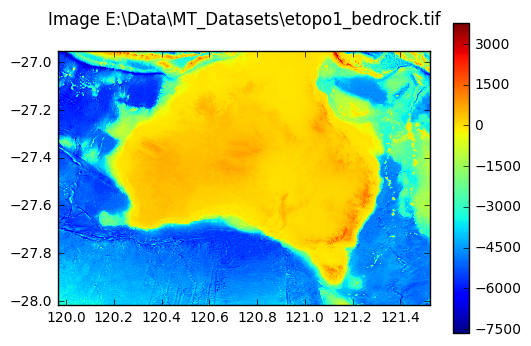

In [41]:
plot_geotiff('E:\\Data\\MT_Datasets\\etopo1_bedrock.tif')



In [10]:
# ! gdalinfo /e/Data/uncoverml/GA-cover2/PM_Gravity.tif
! gdalinfo E:/Data/MT_Datasets/etopo1_bedrock.tif

Driver: GTiff/GeoTIFF
Files: E:/Data/MT_Datasets/etopo1_bedrock.tif
Size is 3545, 2393
Coordinate System is:
GEOGCS["WGS 84",
    DATUM["WGS_1984",
        SPHEROID["WGS 84",6378137,298.257223563,
            AUTHORITY["EPSG","7030"]],
        AUTHORITY["EPSG","6326"]],
    PRIMEM["Greenwich",0],
    UNIT["degree",0.0174532925199433],
    AUTHORITY["EPSG","4326"]]
Origin = (103.075000000000000,-7.508333333333333)
Pixel Size = (0.016666666666667,-0.016666666666667)
Metadata:
  AREA_OR_POINT=Area
  TIFFTAG_RESOLUTIONUNIT=2 (pixels/inch)
  TIFFTAG_XRESOLUTION=72
  TIFFTAG_YRESOLUTION=72
Image Structure Metadata:
  COMPRESSION=LZW
  INTERLEAVE=BAND
Corner Coordinates:
Upper Left  ( 103.0750000,  -7.5083333) (103d 4'30.00"E,  7d30'30.00"S)
Lower Left  ( 103.0750000, -47.3916667) (103d 4'30.00"E, 47d23'30.00"S)
Upper Right ( 162.1583333,  -7.5083333) (162d 9'30.00"E,  7d30'30.00"S)
Lower Right ( 162.1583333, -47.3916667) (162d 9'30.00"E, 47d23'30.00"S)
Center      ( 132.6166667, -27.4500000)

In [ ]:
# Complete Rerun Wofs

tifile0='/short/v10/fxz547/uncoverml/GA-cover2.out/test_svr_prediction.tif'
#tifile1='/xdisk/fzhang/outdir/fei_test_svr_prediction.tif'
tifile1='/short/v10/fxz547/uncoverml/GA-cover2.out/sirsam_Na_svr_prediction.tif'
tifile1='/short/v10/fxz547/uncoverml/GA-cover2.out/sirsam_potassium_randomforest_prediction.tif'

    
imga=read_raster_bands(tifile0)  # not use mpirun
imgb=read_raster_bands(tifile1)  # mpirun -n 4

f, ax = plt.subplots(1,2,figsize=(20,10))
ax[0].imshow(imga[0]) #, cmap='Greys')
ax[0].set_title('%s\n'%('Image '+tifile0))
#plt.show()    

ax[1].imshow(imgb[0]) #, cmap='Greys')
ax[1].set_title('%s\n'%('Image '+tifile1))  

plt.show()

In [ ]:
def compare_two_files_pixels(rastfile_a,rastfile_b):
    """ 
    Compare pixel values of two geo-raster files.
    The result could be raster pixel values equal, but their metadata could differ.
    return True if idenitcal, False if not
    """
    numalist_a = read_raster_bands(rastfile_a)
    numalist_b = read_raster_bands(rastfile_b)

    print ("The number of bands in each raster files:")
    print (len(numalist_a) , len(numalist_b))

    if len(numalist_a) != len(numalist_b):
        return False
    
    for n in range(0,len(numalist_a) ):
        print ("The numerical sums of the band ", n, "in each raster files: ")
        print (np.sum(numalist_a[n]), np.sum(numalist_b[n]))
    
        is_all_eq = (numalist_a[n]==numalist_b[n]).all()
        
        if is_all_eq is False:
            print ("Not all are equal in the band ", n)
            
            return is_all_eq
        
    print ("Comparison of the two files pixel values result in:")
    
    return True

In [ ]:

numalist_a = read_raster_bands(tifile0)
numalist_b = read_raster_bands(tifile1)

bo=compare_two_files_pixels(tifile0, tifile1)

print (bo)

In [ ]:
def compare_two_dirs_rasterfiles(dir_a, dir_b):
    """Compare two directory's tiff files, 
    if they have the same number of tif files, same named, same pixel values for every tif pair"
    """
    
    # loop over dir_a's files to compare each with dir_b's same named file


    #filelist= glob.glob(self.extentdir + "/LS8*.tif") #os.listdir(self.extentdir)
    filelist= glob.glob(dir_a+ "/*.tif") #os.listdir(self.extentdir)

    for afile in filelist:
        
        fname=os.path.basename(afile)
        bfile =os.path.join(dir_b, fname)
        print ("comparing file %s and %s" %(afile, bfile))
        
        res = compare_two_files_pixels(afile,bfile)
        print (res)
        


In [ ]:
compare_two_dirs_rasterfiles(WATER_EXTENTS_DIR+'/'+cell_index, WATER_EXTENTS_DIR_OLD+'/'+cell_index)
